## Projekt Zaliczeniowy Bootcamp, 2020-07-13
## Aleksandra Zowada 
## Temat1: Przewidywanie ceny domów. Celem projektu jest zastosowanie modeli regresji do przewidzenia ceny domu o podanych cechach.

# Spis Tresci
## 1. Przygotowanie danych

1a. Zaczytanie pakietow  \
1b. Import danych \
1c. Wyodrebniam zmienna celu \
1d. Analiza brakow danych \
1e. Analiza zmiennych numerycznych \
1f. Analiza zmiennych tekstowych \
1g. Analiza zmiennych porzadkowych \
1h. Inne przeksztacenia zmiennych \
1i. Podsumowanie przeksztalcenia

## 2. Analiza zmiennej celu

## 3. Modelowanie
3a. Zaczytanie pakietow \
3b. Podzial danych na zbior treningowy i testowy \
3c. Regresja liniowa  \
3d. Regresja Lasso  \
3e. Las losowy regresyjny

## 4. Porownanie modeli
4a. Porownanie predykcji z 3 metod modelowania \
4b. Porownanie metryk z 3 metod modelowania \
4c. Porownanie wykresow wartosci przewidywanych z 3 metod modelowania \
4d. Porownanie wykresow residuow z 3 metod modelowania \
4e. Wybor najlepszej metody modelowania

## 5. Wyniki
5a. Ostateczny ksztalt modelu \
5b. Wskazanie najważniejszych zmiennych

## 1. Przygotowanie danych

1a. Zaczytanie pakietow

In [1]:
import numpy as np
import pandas as pd
import seaborn as seabornInstance 
import matplotlib.pyplot as plt  
%matplotlib inline

1b. Import danych

In [2]:
data = pd.read_csv("Dane/ames2000_NAfix.csv",decimal=",")
data.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,120,RL,34,3901,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,8,2007,New,Partial,204000
1,20,RL,70,8400,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,MnPrv,None,0,4,2010,WD,Normal,126000
2,85,RL,60,7200,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,MnPrv,None,0,4,2009,WD,Normal,133900
3,90,RL,64,7018,Pave,None,Reg,Bnk,AllPub,Inside,...,0,None,None,None,0,6,2009,WD,Alloca,118858
4,60,RL,111,16259,Pave,None,Reg,Lvl,AllPub,Corner,...,0,None,None,None,0,9,2006,New,Partial,342643


In [3]:
data.columns

Index(['MS.SubClass', 'MS.Zoning', 'Lot.Frontage', 'Lot.Area', 'Street',
       'Alley', 'Lot.Shape', 'Land.Contour', 'Utilities', 'Lot.Config',
       'Land.Slope', 'Neighborhood', 'Condition.1', 'Condition.2', 'Bldg.Type',
       'House.Style', 'Overall.Qual', 'Overall.Cond', 'Year.Built',
       'Year.Remod.Add', 'Roof.Style', 'Roof.Matl', 'Exterior.1st',
       'Exterior.2nd', 'Mas.Vnr.Type', 'Mas.Vnr.Area', 'Exter.Qual',
       'Exter.Cond', 'Foundation', 'Bsmt.Qual', 'Bsmt.Cond', 'Bsmt.Exposure',
       'BsmtFin.Type.1', 'BsmtFin.SF.1', 'BsmtFin.Type.2', 'BsmtFin.SF.2',
       'Bsmt.Unf.SF', 'Total.Bsmt.SF', 'Heating', 'Heating.QC', 'Central.Air',
       'Electrical', 'X1st.Flr.SF', 'X2nd.Flr.SF', 'Low.Qual.Fin.SF',
       'Gr.Liv.Area', 'Bsmt.Full.Bath', 'Bsmt.Half.Bath', 'Full.Bath',
       'Half.Bath', 'Bedroom.AbvGr', 'Kitchen.AbvGr', 'Kitchen.Qual',
       'TotRms.AbvGrd', 'Functional', 'Fireplaces', 'Fireplace.Qu',
       'Garage.Type', 'Garage.Yr.Blt', 'Garage.Finish', 'Ga

1c. Wyodrebniam zmienna celu

In [4]:
y = data.SalePrice
data = data.drop(["SalePrice"],axis=1)

1d. Analiza brakow danych

In [5]:
# zmieniam kolumne tekstowa 'None' na np.Nan
# podmieniam typ kolumny, zeby tam gdzie typ kolumny byl tekstowy jedynie przez braki danych uzyskac kolumne numeryczna
data=data.replace('None', np.nan)
data=data.apply(pd.to_numeric, errors="ignore")

1e. Analiza zmiennych numerycznych

In [6]:
# wypisuje kolumny numeryczne w ktorych sa braki danych
data_numeric=data.select_dtypes(include=np.number)
col_numeric = pd.Series.to_frame(data_numeric.isna().sum())
col_numeric[col_numeric[0]>0]

,0
Lot.Frontage,334
Mas.Vnr.Area,16
BsmtFin.SF.1,1
BsmtFin.SF.2,1
Bsmt.Unf.SF,1
Total.Bsmt.SF,1
Bsmt.Full.Bath,1
Bsmt.Half.Bath,1
Garage.Yr.Blt,112
Garage.Cars,1


analizuje kazda zienna na podstawie opisu i zawartosci uzupelniam braki danych

In [7]:
# braki danych zmieniam na 0
data['Lot.Frontage']= data['Lot.Frontage'].fillna(0)
data['Mas.Vnr.Area']= data['Mas.Vnr.Area'].fillna(0)
data['BsmtFin.SF.1']= data['BsmtFin.SF.1'].fillna(0)
data['BsmtFin.SF.2']= data['BsmtFin.SF.2'].fillna(0)
data['Bsmt.Unf.SF']= data['Bsmt.Unf.SF'].fillna(0)
data['Total.Bsmt.SF']= data['Total.Bsmt.SF'].fillna(0)
data['Bsmt.Full.Bath']= data['Bsmt.Full.Bath'].fillna(0)
data['Bsmt.Half.Bath']= data['Bsmt.Half.Bath'].fillna(0)

In [8]:
# zmiana powierzchni garazu, 
# jezeli garaz istnieje - powierzchnie ustawiam na srednia powierzchnie garazu dla 1 auta
# jezeli garaz nie istnieje - powierzchnie ustawiam na 0
data.loc[(data['Garage.Area'].isna()) &  (data['Garage.Type'].notnull()),'Garage.Area']= data[data['Garage.Cars']==1]['Garage.Area'].mean()
data.loc[(data['Garage.Area'].isna()) &  (data['Garage.Type'].isna()),'Garage.Area']= 0

In [9]:
# zmiana pojemnosci garazu
# jezeli garaz istnieje - pojemnosc ustawiam na 1 auto
# jezeli garaz nie istnieje - pojemnosc ustawiam na 0 aut
data.loc[(data['Garage.Cars'].isna()) &  (data['Garage.Type'].notnull()),'Garage.Cars']= 1
data.loc[(data['Garage.Cars'].isna()) &  (data['Garage.Type'].isna()),'Garage.Cars']= 0

In [10]:
# zmiana roku budowy garazu, 
# jezeli garaz istnieje - rok budowy garazu ustawiam na rok budowy budynku
# jezeli garaz nie istnieje - rok budowy garazu ustawiam na 0
data.loc[(data['Garage.Yr.Blt'].isna()) &  (data['Garage.Type'].notnull()),'Garage.Yr.Blt']= data['Year.Built']
data.loc[(data['Garage.Yr.Blt'].isna()) &  (data['Garage.Type'].isna()),'Garage.Yr.Blt']= 0

In [11]:
# ponownie wypisuje kolumny numeryczne w ktorych sa braki danych, 
# pusty wynik oznacza uzupelnienie wszystkich brakow danych dla wartosci numarycznych
data_numeric=data.select_dtypes(include=np.number)
col_numeric = pd.Series.to_frame(data_numeric.isna().sum())
col_numeric[col_numeric[0]>0]

,0


1f. Analiza zmiennych tekstowych

In [12]:
# wypisuje kolumny tekstowe w ktorych sa braki danych
data_char=data.select_dtypes(include='object')
col_numeric = pd.Series.to_frame(data_char.isna().sum())
col_numeric[col_numeric[0]>0]

,0
Alley,1865
Mas.Vnr.Type,1232
Bsmt.Qual,53
Bsmt.Cond,53
Bsmt.Exposure,55
BsmtFin.Type.1,53
BsmtFin.Type.2,54
Fireplace.Qu,980
Garage.Type,110
Garage.Finish,112


analizuje kazda zienna na podstawie opisu i zawartosci uzupelniam braki danych

In [13]:
# braki danych zmiana na 'NA'
data['Alley']= data['Alley'].fillna('NA')
data['Mas.Vnr.Type']= data['Mas.Vnr.Type'].fillna('NA')
data['Bsmt.Qual']= data['Bsmt.Qual'].fillna('NA')
data['Bsmt.Cond']= data['Bsmt.Cond'].fillna('NA')
data['Bsmt.Exposure']= data['Bsmt.Exposure'].fillna('NA')
data['BsmtFin.Type.1']= data['BsmtFin.Type.1'].fillna('NA')
data['BsmtFin.Type.2']= data['BsmtFin.Type.2'].fillna('NA')
data['Garage.Type']= data['Garage.Type'].fillna('NA')
data['Fence']= data['Fence'].fillna('NA')
data['Misc.Feature']= data['Misc.Feature'].fillna('NA')

In [14]:
# zmiana jakosci kominka, 
# jezeli kominek nie istnieje - 'NA'
# jezeli kominek istnieje - srodkowa kategorie dla tej zmiennej
data.loc[(data['Fireplace.Qu'].isna()) &  (data['Fireplaces']==0),'Fireplace.Qu']= 'NA'
data.loc[(data['Fireplace.Qu'].isna()) &  (data['Fireplaces']>0),'Fireplace.Qu']= 'TA'

In [15]:
# zmiana wykonczenia garazu, 
# jezeli garaz nie istnieje - 'NA'
# jezeli garaz istnieje - srodkowa kategorie dla tej zmiennej
data.loc[(data['Garage.Finish'].isna()) &  (data['Garage.Type']=='NA'),'Garage.Finish']= 'NA'
data.loc[(data['Garage.Finish'].isna()) &  (data['Garage.Type']!='NA'),'Garage.Finish']= 'RFn'

In [16]:
# zmiana kwalifikacji garazu, 
# jezeli garaz nie istnieje - 'NA'
# jezeli garaz istnieje - srodkowa kategorie dla tej zmiennej
data.loc[(data['Garage.Qual'].isna()) &  (data['Garage.Type']=='NA'),'Garage.Qual']= 'NA'
data.loc[(data['Garage.Qual'].isna()) &  (data['Garage.Type']!='NA'),'Garage.Qual']= 'TA'

In [17]:
# zmiana jakosci garazu, 
# jezeli garaz nie istnieje - 'NA'
# jezeli garaz istnieje - srodkowa kategorie dla tej zmiennej
data.loc[(data['Garage.Cond'].isna()) &  (data['Garage.Type']=='NA'),'Garage.Cond']= 'NA'
data.loc[(data['Garage.Cond'].isna()) &  (data['Garage.Type']!='NA'),'Garage.Cond']= 'TA'

In [18]:
# zmiana jakosci basenu, 
# jezeli basen nie istnieje - 'NA'
# jezeli basen istnieje - srodkowa kategorie dla tej zmiennej
data.loc[(data['Pool.QC'].isna()) &  (data['Pool.Area']==0),'Pool.QC']= 'NA'
data.loc[(data['Pool.QC'].isna()) &  (data['Pool.Area']>0),'Pool.QC']= 'TA'

In [19]:
# ponownie wypisuje kolumny tekstowe w ktorych sa braki danych, 
# pusty wynik oznacza uzupelnienie wszystkich brakow danych dla wartosci tekstowych
data_char=data.select_dtypes(include='object')
col_numeric = pd.Series.to_frame(data_char.isna().sum())
col_numeric[col_numeric[0]>0]

,0


1g. Analiza zmiennych porzadkowych

In [20]:
# zmienne porzadkowe zamieniam na liczby 0-7

In [21]:
dict_1={'Ex':5 ,    'Gd':4 ,    'TA':3 ,    'Fa':2 ,    'Po':1 , 'NA':0 }

data["Exter.Qual"] = data["Exter.Qual"].replace(dict_1)
data["Exter.Cond"] = data["Exter.Cond"].replace(dict_1)
data["Bsmt.Qual"] = data["Bsmt.Qual"].replace(dict_1)
data["Bsmt.Cond"] = data["Bsmt.Cond"].replace(dict_1)
data["Heating.QC"] = data["Heating.QC"].replace(dict_1)
data["Kitchen.Qual"] = data["Kitchen.Qual"].replace(dict_1)
data["Fireplace.Qu"] = data["Fireplace.Qu"].replace(dict_1)
data["Garage.Qual"] = data["Garage.Qual"].replace(dict_1)
data["Garage.Cond"] = data["Garage.Cond"].replace(dict_1)
data["Pool.QC"] = data["Pool.QC"].replace(dict_1)

In [22]:
dict_2={'GLQ':6 , 'ALQ':5 , 'BLQ':4 , 'Rec':3 , 'LwQ':2 , 'Unf':1 , 'NA':0 }

data["BsmtFin.Type.1"] = data["BsmtFin.Type.1"].replace(dict_2)
data["BsmtFin.Type.2"] = data["BsmtFin.Type.2"].replace(dict_2)

In [23]:
data["Lot.Shape"] = data["Lot.Shape"].replace({"Reg": 4,"IR1": 3,"IR2": 2,"IR3": 1})
data["Utilities"] = data["Utilities"].replace({'AllPub': 4, 'NoSewr': 3,'NoSeWa': 2, 'ELO': 1})
data["Land.Slope"] = data["Land.Slope"].replace({'Gtl': 3,'Mod': 2, 'Sev': 1})
data["Bsmt.Exposure"] = data["Bsmt.Exposure"].replace({'Gd':4 ,'Av':3 ,'Mn':2 ,'No':1 ,'NA':0 })
data["Functional"] = data["Functional"].replace({'Typ' :7,'Min1' :6,'Min2' :5,'Mod' :4,'Maj1' :3,'Maj2' :2,'Sev' :1,'Sal' :0})
data["Garage.Finish"] = data["Garage.Finish"].replace({'Fin':3 ,'RFn':2 ,'Unf':1 ,'NA':0 })
data["Paved.Drive"] = data["Paved.Drive"].replace({'Y':3,'P':2,'N':1})
data["Fence"] = data["Fence"].replace({'GdPrv': 4,'MnPrv': 3,'GdWo': 2,'MnWw': 1,'NA':0 })
data["Central.Air"] = data["Central.Air"].replace({'Y': 1,'N': 0 })

1h. Inne przeksztacenia zmiennych

In [24]:
data["MS.Zoning"] = data["MS.Zoning"].replace({'C (all)': 'C','I (all)': 'I' ,'A (agr)' :'A'})

1i. Podsumowanie przeksztalcenia 

In [25]:
data.describe()

,MS.SubClass,Lot.Frontage,Lot.Area,Lot.Shape,Utilities,Land.Slope,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,...,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Val,Mo.Sold,Yr.Sold
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.0,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000
mean,56.945000,57.84150,10296.665000,3.597000,4.0,2.943000,6.082000,5.574000,1971.079500,1984.013500,...,46.335000,23.936500,2.116000,15.681500,2.934000,0.020500,0.585500,42.51300,6.217500,2007.799500
std,42.699281,33.74802,8828.208491,0.578583,0.0,0.260355,1.387169,1.105502,29.985426,20.881771,...,65.685433,66.144388,20.668119,54.270505,41.080828,0.286567,1.218783,440.83108,2.726336,1.316118
min,20.000000,0.00000,1300.000000,1.000000,4.0,1.000000,1.000000,1.000000,1872.000000,1950.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,2006.000000
25%,20.000000,43.00000,7500.000000,3.000000,4.0,3.000000,5.000000,5.000000,1954.000000,1965.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,4.000000,2007.000000
50%,50.000000,63.00000,9465.000000,4.000000,4.0,3.000000,6.000000,5.000000,1972.000000,1993.000000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,6.000000,2008.000000
75%,70.000000,78.00000,11500.000000,4.000000,4.0,3.000000,7.000000,6.000000,2000.000000,2004.000000,...,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,8.000000,2009.000000
max,190.000000,313.00000,215245.000000,4.000000,4.0,3.000000,10.000000,9.000000,2010.000000,2010.000000,...,742.000000,1012.000000,320.000000,480.000000,800.000000,5.000000,4.000000,15500.00000,12.000000,2010.000000


In [26]:
X=pd.get_dummies(data)
X.head()

,MS.SubClass,Lot.Frontage,Lot.Area,Lot.Shape,Utilities,Land.Slope,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,...,Sale.Type_New,Sale.Type_Oth,Sale.Type_VWD,Sale.Type_WD,Sale.Condition_Abnorml,Sale.Condition_AdjLand,Sale.Condition_Alloca,Sale.Condition_Family,Sale.Condition_Normal,Sale.Condition_Partial
0,120,34.0,3901,4,4,3,6,5,2005,2006,...,1,0,0,0,0,0,0,0,0,1
1,20,70.0,8400,4,4,3,4,5,1970,1970,...,0,0,0,1,0,0,0,0,1,0
2,85,60.0,7200,4,4,3,5,8,1972,2003,...,0,0,0,1,0,0,0,0,1,0
3,90,64.0,7018,4,4,3,5,5,1979,1979,...,0,0,0,1,0,0,1,0,0,0
4,60,111.0,16259,4,4,3,9,5,2006,2006,...,1,0,0,0,0,0,0,0,0,1


## 2. Analiza zmiennej celu

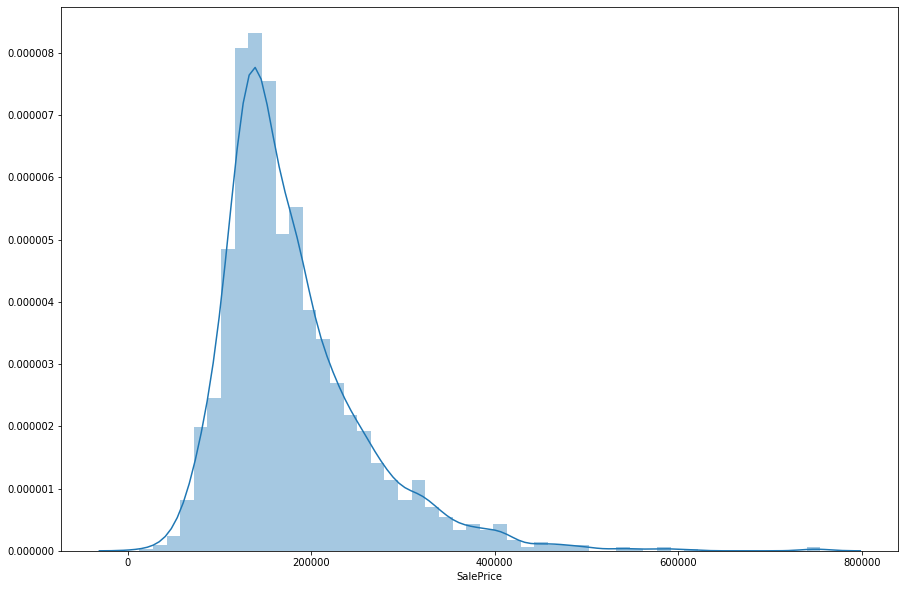

In [27]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(y)

## 3. Modelowanie

3a. Zaczytanie pakietow

In [28]:
from sklearn import metrics
from sklearn import model_selection

from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [29]:
seed=123
kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)

In [30]:
from warnings import filterwarnings
filterwarnings("ignore")

3b. Podzial danych na zbior treningowy i testowy

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

3c. Regresja liniowa 

Wybor parametrow modelu

In [32]:
parameters = {'polynomialfeatures__degree': [1, 2, 3]}

lin_reg = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), LinearRegression()),
                       param_grid=parameters,
                       cv=5,
                       refit=True)
lin_reg.fit(X_train, y_train)
lin_reg.best_params_

{'polynomialfeatures__degree': 1}

Naliczenie predykcji na zbiorze testowym oraz wyznaczenie metryk na zbiorze testowym.

In [33]:
y_pred_lin_reg = lin_reg.best_estimator_.predict(X_test)

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lin_reg))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lin_reg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin_reg)))
print("R^2: {}".format(metrics.r2_score(y_test, y_pred_lin_reg)))

Mean Absolute Error: 18719.72224151138
Mean Squared Error: 1551381960.0408804
Root Mean Squared Error: 39387.586369830795
R^2: 0.7321653099944203


3d. Regresja Lasso 

Wybor parametrow modelu

In [35]:
parameters = {'polynomialfeatures__degree': [1, 2, 3],
              'lasso__alpha': [0.1, 1, 10,100,1000]}

lasso_reg = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), Lasso()),
                    param_grid=parameters,
                    cv=5,
                    refit=True)
lasso_reg.fit(X_train, y_train)
lasso_reg.best_params_

{'lasso__alpha': 100, 'polynomialfeatures__degree': 1}

Naliczenie predykcji na zbiorze testowym oraz wyznaczenie metryk na zbiorze testowym.

In [36]:
y_pred_lasso_reg = lasso_reg.best_estimator_.predict(X_test)

In [37]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_lasso_reg))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_lasso_reg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso_reg)))
print("R^2: {}".format(metrics.r2_score(y_test, y_pred_lasso_reg)))

Mean Absolute Error: 18271.331689956554
Mean Squared Error: 1510022186.6600223
Root Mean Squared Error: 38859.003932937114
R^2: 0.7393057708012942


3e. Las losowy regresyjny

Wybor parametrow modelu

In [38]:
parameters = {'n_estimators': [200, 700],
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [2,10,20]}

RFR = RandomForestRegressor(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True ) 
RandFor_reg = GridSearchCV(estimator=RFR, param_grid=parameters, cv= kfold, refit=True)
RandFor_reg.fit(X_train, y_train)
RandFor_reg.best_params_

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 200}

Naliczenie predykcji na zbiorze testowym oraz wyznaczenie metryk na zbiorze testowym.

In [39]:
y_pred_RandFor_reg= RandFor_reg.best_estimator_.predict(X_test)

In [40]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_RandFor_reg))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_RandFor_reg))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_RandFor_reg)))
print("R^2: {}".format(metrics.r2_score(y_test, y_pred_RandFor_reg)))

Mean Absolute Error: 18677.19515415231
Mean Squared Error: 1187184086.916101
Root Mean Squared Error: 34455.5378265396
R^2: 0.7950413952922643


## 4. Porownanie modeli

4a. Porownanie predykcji z 3 metod modelowania

In [41]:
porownanie = pd.DataFrame({'Actual': y_test, 
                   'Predicted_lin_reg': np.round(y_pred_lin_reg,2),
                   'Predicted_lasso_reg': np.round(y_pred_lasso_reg,2),
                   'Predicted_RandFor_reg': np.round(y_pred_RandFor_reg,2)})
porownanie.head(5)

,Actual,Predicted_lin_reg,Predicted_lasso_reg,Predicted_RandFor_reg
742,133500,116165.33,117572.17,131286.25
43,238500,226701.94,225606.40,220717.66
938,124000,111087.67,104792.79,118988.14
1005,410000,378366.00,377186.98,357491.60
108,193879,204235.96,204437.70,188694.18


4b. Porownanie metryk z 3 metod modelowania

In [42]:
models = []
models.append(('RegLin', lin_reg.best_estimator_))
models.append(('Lasso', lasso_reg.best_estimator_))
models.append(('RandFor', RandFor_reg.best_estimator_))

r2 = []
median_absolute_error = []
mean_squared_error = []
mean_absolute_error = []

for name, model in models:
    r2.append(round(metrics.r2_score(y_test, model.predict(X_test)),4))
    median_absolute_error.append(round(metrics.median_absolute_error(y_test, model.predict(X_test)),4))
    mean_squared_error.append(round(metrics.mean_squared_error(y_test, model.predict(X_test)),9))
    mean_absolute_error.append(round(metrics.mean_absolute_error(y_test, model.predict(X_test)),4))

In [43]:
wynik = {'r2': r2, 
     'median_absolute_error': median_absolute_error,
     'mean_squared_error' : mean_squared_error,
     'mean_absolute_error' : mean_absolute_error  }
wyniki = pd.DataFrame(data=wynik)
wyniki.insert(loc=0, column='Method', value=[models[0][0],models[1][0],models[2][0]])
wyniki

,Method,r2,median_absolute_error,mean_squared_error,mean_absolute_error
0,RegLin,0.7322,12198.7294,1.551382e+09,18719.7222
1,Lasso,0.7393,12292.4941,1.510022e+09,18271.3317
2,RandFor,0.7950,10864.4850,1.187184e+09,18677.1952


4c. Porownanie wykresow wartosci przewidywanych z 3 metod modelowania

In [44]:
# Wykresy wartości przewidywanych od prawdziwych

def wykres_wart(regressor,regressor_name):

    plt.scatter(y_train, regressor.best_estimator_.predict(X_train), 
                color = "green", s = 10, label = 'Train data') 
    plt.scatter(y_test, regressor.best_estimator_.predict(X_test), 
                color = "blue", s = 10, label = 'Test data') 

    plt.xlim(0, 600000) 
    plt.ylim(0, 600000)     

    plt.legend(loc = 'upper right') 
    plt.title(f"Wykresy wartości przewidywanych od prawdziwych: {regressor_name}") 
    plt.show() 

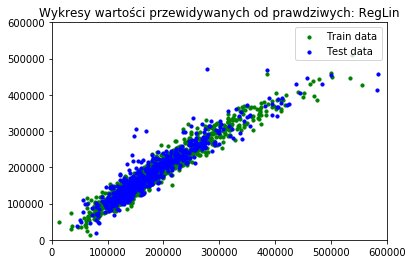

In [45]:
wykres_wart(lin_reg,'RegLin')

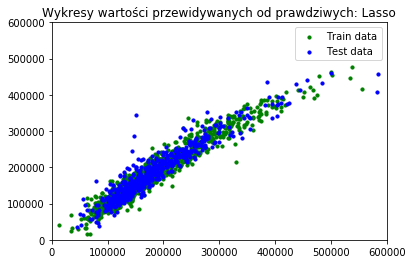

In [46]:
wykres_wart(lasso_reg,'Lasso')

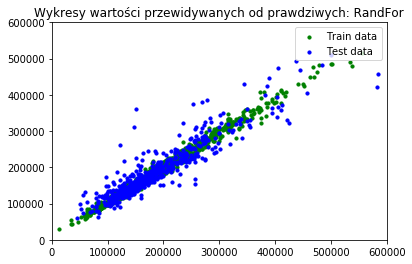

In [47]:
wykres_wart(RandFor_reg,'RandFor')

4d. Porownanie wykresow residuow z 3 metod modelowania

In [48]:
# wykres residuow

def wykres_res(regressor,regressor_name):
#     plt.style.use('fivethirtyeight') 
    plt.scatter(regressor.best_estimator_.predict(X_train), regressor.best_estimator_.predict(X_train) - y_train, 
                color = "green", s = 10, label = 'Train data') 
    plt.scatter(regressor.best_estimator_.predict(X_test), regressor.best_estimator_.predict(X_test) - y_test, 
                color = "blue", s = 10, label = 'Test data') 
    plt.hlines(y = 0, xmin = 0, xmax = 600000, linewidth = 2) 
    plt.xlim(0, 600000) 
    plt.ylim(-200000, 200000) 
    plt.legend(loc = 'upper right') 
    plt.title(f"Wykres residuow: {regressor_name}") 
    plt.show() 

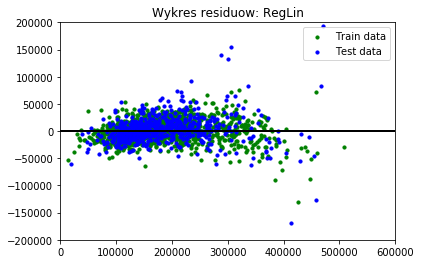

In [49]:
wykres_res(lin_reg,'RegLin')

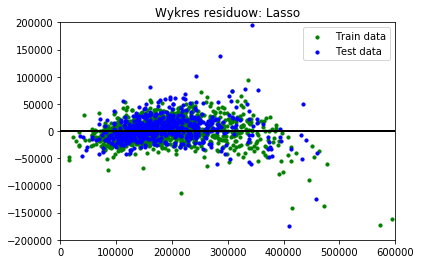

In [50]:
wykres_res(lasso_reg,'Lasso')

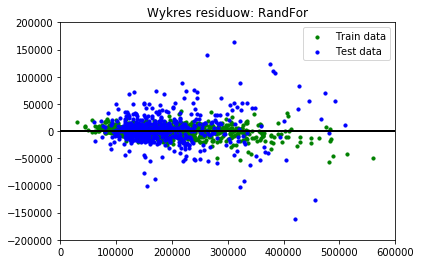

In [51]:
wykres_res(RandFor_reg,'RandFor')

4e. Wybor najlepszej metody modelowania

Najlepszy wynik zostal osiagniety dla lasow losowych regresyjnych. Najnisza wartosc R^2 oraz zadowalajacy wynik wskaznika MAE prowadza do ostatecznego wyboru tej metody modelowania. Dodatkowo wykres wartosci przewidywanych oraz wykres reziduow swiadczy o zadowalajacej stabilnosci modelu.

## 5. Wyniki

5a. Ostateczny ksztalt modelu

In [66]:
parameters = {'n_estimators': [200],
              'max_features': ['auto'],
              'max_depth' : [20]}

RFR = RandomForestRegressor(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True ) 
model = GridSearchCV(estimator=RFR, param_grid=parameters, cv= kfold, refit=True)
model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=123, shuffle=True),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='sqrt',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=-1,
                                             oob_score=True, random_state=None,
                                             verbose=

In [67]:
y_pred= model.predict(X_test)

In [68]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R^2: {}".format(metrics.r2_score(y_test, y_pred)))

Mean Absolute Error: 18877.485434246206
Mean Squared Error: 1193624024.848056
Root Mean Squared Error: 34548.864306197625
R^2: 0.7939295873532219


5b. Wskazanie najważniejszych zmiennych

In [69]:
feature = pd.DataFrame(model.best_estimator_.feature_importances_, X_train.columns,columns=['Coefficient']).sort_values(by='Coefficient', ascending=False).iloc[:40,:]
feature.reset_index(level=0, inplace=True)

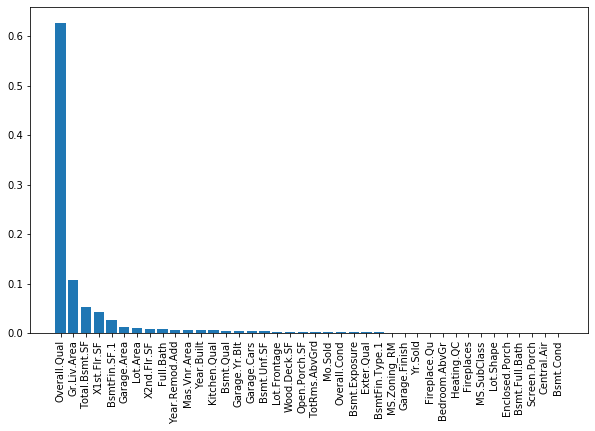

In [70]:
names =feature.iloc[:,0]
value=feature.iloc[:,1]

ticks = [i for i in range(len(names))]

plt.figure(figsize=(10,6));
plt.xticks(ticks, names, rotation='vertical')
plt.bar(ticks, value)
plt.show()

KONIEC